In [2]:
pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 861.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.2
    Uninstalling pyparsing-3.1.2:
      Successfully uninstalled pyparsing-3.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: matplotlib-in

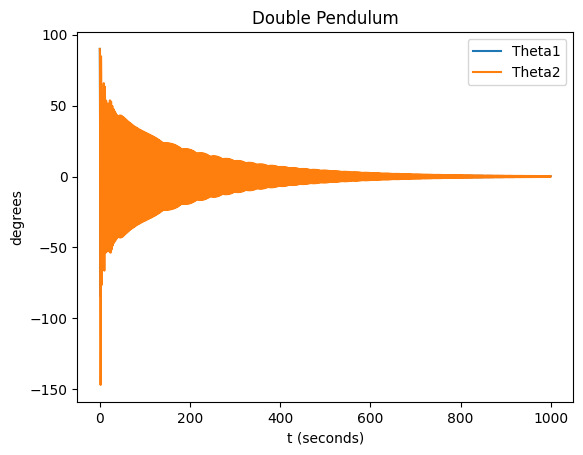

Epoch 1, Train Loss: 0.0883, Validation Loss: 0.0066
Epoch 2, Train Loss: 0.0032, Validation Loss: 0.0018
Epoch 3, Train Loss: 0.0017, Validation Loss: 0.0017
Epoch 4, Train Loss: 0.0016, Validation Loss: 0.0016
Epoch 5, Train Loss: 0.0016, Validation Loss: 0.0016
Epoch 6, Train Loss: 0.0016, Validation Loss: 0.0016
Epoch 7, Train Loss: 0.0015, Validation Loss: 0.0016
Epoch 8, Train Loss: 0.0015, Validation Loss: 0.0015
Epoch 9, Train Loss: 0.0015, Validation Loss: 0.0015
Epoch 10, Train Loss: 0.0015, Validation Loss: 0.0015
Epoch 11, Train Loss: 0.0015, Validation Loss: 0.0015
Epoch 12, Train Loss: 0.0015, Validation Loss: 0.0014
Epoch 13, Train Loss: 0.0015, Validation Loss: 0.0014
Epoch 14, Train Loss: 0.0014, Validation Loss: 0.0014
Epoch 15, Train Loss: 0.0014, Validation Loss: 0.0014
Epoch 16, Train Loss: 0.0013, Validation Loss: 0.0014
Epoch 17, Train Loss: 0.0013, Validation Loss: 0.0013
Epoch 18, Train Loss: 0.0012, Validation Loss: 0.0013
Epoch 19, Train Loss: 0.0012, Validat

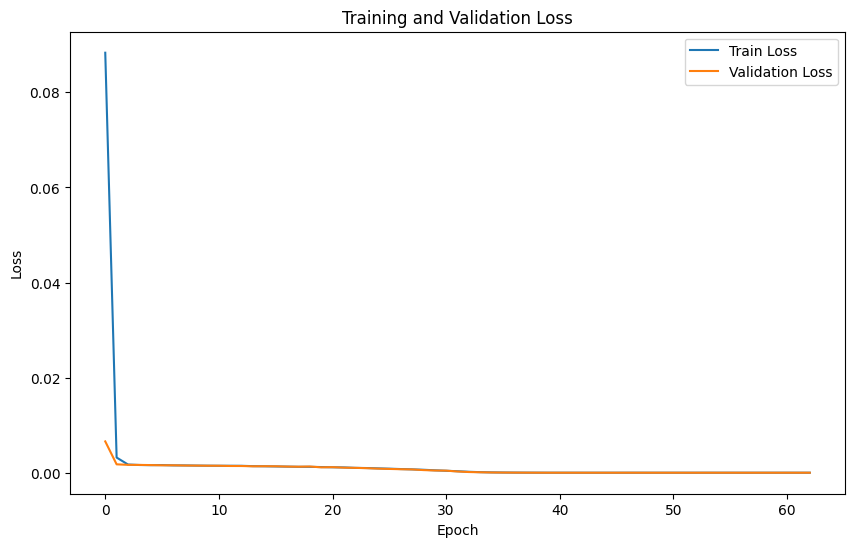

Test RMSE: 0.002732150489464402
R^2 Score: 0.9966091973030788


In [8]:
# Aarjav Jain
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi
from numpy import array
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error, r2_score

g = 9.81
L1 = 1
L2 = 1
m1 = 1.0
m2 = 1.0

def f(r, t, L1, L2):
    theta1 = r[0]
    omega1 = r[1]
    theta2 = r[2]
    omega2 = r[3]
    ftheta1 = omega1
    fomega1 = (-g * (2 * m1 + m2) * sin(theta1) - m2 * g * sin(theta1 - 2 * theta2) - 2 * sin(theta1 - theta2) * m2 *
               (omega2**2 * L2 + omega1**2 * L1 * cos(theta1 - theta2))) / (L1 * (2 * m1 + m2 - m2 * cos(2 * theta1 - 2 * theta2)))
    ftheta2 = omega2
    fomega2 = (2 * sin(theta1 - theta2) * (omega1**2 * L1 * (m1 + m2) + g * (m1 + m2) * cos(theta1) + omega2**2 * L2 * m2 *
                                           cos(theta1 - theta2))) / (L2 * (2 * m1 + m2 - m2 * cos(2 * theta1 - 2 * theta2)))
    return array([ftheta1, fomega1, ftheta2, fomega2], float)

a = 0.0
b = 1000
N = 3000
h = (b - a) / N

tpoints = np.arange(a, b, h)
theta1_points = np.zeros_like(tpoints)
theta2_points = np.zeros_like(tpoints)
q = np.array([pi / 2, 0, pi / 2, 0], float)

for i, t in enumerate(tpoints):
    theta1_points[i] = q[0] * 180 / pi
    theta2_points[i] = q[2] * 180 / pi
    k1 = h * f(q, t, L1, L2)
    k2 = h * f(q + 0.5 * k1, t + 0.5 * h, L1, L2)
    k3 = h * f(q + 0.5 * k2, t + 0.5 * h, L1, L2)
    k4 = h * f(q + k3, t + h, L1, L2)
    q += (k1 + 2 * k2 + 2 * k3 + k4) / 6

plt.plot(tpoints, theta1_points, label='Theta1')
plt.plot(tpoints, theta2_points, label='Theta2')
plt.title("Double Pendulum")
plt.xlabel("t (seconds)")
plt.ylabel("degrees")
plt.legend()
plt.show()

# Combine Data
data = np.stack((theta1_points, theta2_points), axis=1)
np.save('pendulum_data.npy', data)

# Load Data
data = np.load('pendulum_data.npy')

# Normalize Data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Create Sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Create Training and Testing Sets
SEQ_LENGTH = 50
X, Y = create_sequences(data, SEQ_LENGTH)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(Y_train, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(Y_test, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

# GRU Model Definition
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        gru_out, _ = self.gru(x)
        output = self.linear(gru_out[:, -1, :])
        return output

input_size = 2
hidden_layer_size = 100
output_size = 2
model = GRUModel(input_size, hidden_layer_size, output_size)

# Initializing weights and biases
for name, param in model.named_parameters():
    if 'weight' in name:
        nn.init.xavier_normal_(param)  # Xavier initialization
    elif 'bias' in name:
        nn.init.uniform_(param, -1, 1)

# Initializing loss and optimizer functions
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
NUM_EPOCHS = 100
PATIENCE = 10

# Training model with loss tracking and early stopping
train_losses = []
val_losses = []

def train_model(model, train_loader, val_loader, num_epochs, patience):
    best_val_loss = float('inf')
    epochs_no_improve = 0
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for sequences, targets in train_loader:
            optimizer.zero_grad()
            y_pred = model(sequences)
            loss = loss_function(y_pred, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for sequences, targets in val_loader:
                y_pred = model(sequences)
                loss = loss_function(y_pred, targets)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        if epochs_no_improve == patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

train_model(model, train_loader, test_loader, NUM_EPOCHS, PATIENCE)

# Plotting Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluating the model
def evaluate_model(model, test_loader):
    model.eval()
    test_loss = 0
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for sequences, targets in test_loader:
            y_pred = model(sequences)
            loss = torch.sqrt(loss_function(y_pred, targets))
            test_loss += loss.item()
            # Append predictions and targets without reshaping
            all_predictions.append(y_pred.detach().cpu().numpy())
            all_targets.append(targets.detach().cpu().numpy())
    avg_test_loss = test_loss / len(test_loader)
    # Concatenate along the batch dimension (axis=0)
    all_predictions = np.concatenate(all_predictions, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)
    # Reshape to match for r2_score: (num_samples, num_outputs)
    rmse = np.sqrt(mean_squared_error(all_targets, all_predictions))
    print(f'Test RMSE: {rmse}')
    r2 = r2_score(all_targets, all_predictions)
    print(f'R^2 Score: {r2}')

evaluate_model(model, test_loader)
